In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import cmocean
import importlib
import timeit
%alias_magic t timeit 

seconds_units = {}
seconds_units['ns'] = 1E-9
seconds_units['us'] = 1E-6
seconds_units['ms'] = 1E-3

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [65]:
importlib.reload(glacier)
ngridx=25
ngridz=10
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 1e6
zz=30
C, S =glacier.glacier(ngridx,ngridz,dt,zz,T)
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)

In [13]:
%%capture time_diffusion
%%timeit -n1
C, S =glacier.glacier(ngridx,ngridz,dt,zz,T)

In [14]:
%%capture time_sinks
%%timeit -n1
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)

In [16]:
time_diff = float(str(time_diffusion).split()[0])
units_diff = (str(time_diffusion).split()[1])
#time_diff_ = time_diff*seconds_units[units_diff]

time_sink = float(str(time_sinks).split()[0])
units_sink =  (str(time_sinks).split()[1])
#time_sink_ = time_sink*seconds_units[units_sink]

time_diff, time_sink

(12.6, 12.7)

Text(0.45, 0.95, 'Steady vs Sinks Methane Concentration')

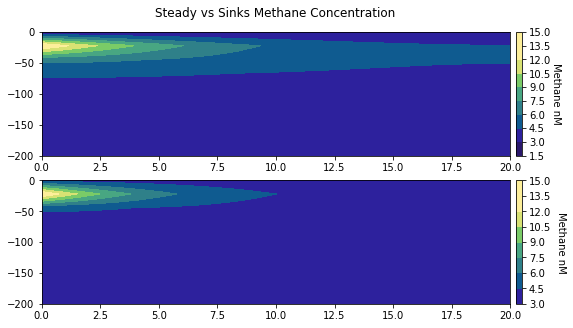

In [66]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap,  vmin = 3, vmax = 12)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01, extend = 'neither')
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap, vmin = 3, vmax = 12)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01, extend = 'min')
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('fig.pdf')

In [137]:
C[-1, 2, :].T

array([4.54429159, 5.64114116, 7.86550915, 5.95905156, 5.20906743,
       4.7795073 , 4.4894373 , 4.27889509, 4.12146731, 4.00291221,
       3.91414666, 3.8485717 , 3.80099025, 3.7671635 , 3.74362035,
       3.72755374, 3.71673337, 3.70941008, 3.70420694, 3.7       ])

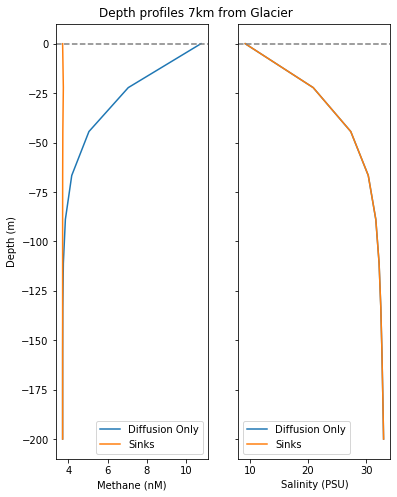

In [62]:
Lp = int(7/20*(ngridx-1))  ## dx_D = D/dx = D/L*(ngrid-1)

fig, axs=plt.subplots(1,2, figsize = (6,8), sharey = True)
axs[0].plot(C[-1, Lp, :].T, -z, label = 'Diffusion Only')
axs[0].plot(Cs[-1, Lp, :].T, -z, label = 'Sinks')
axs[1].plot(S[-1, Lp, :].T, -z, label = 'Diffusion Only')
axs[1].plot(Ss[-1, Lp, :].T, -z, label = 'Sinks')

for ax in axs:
    ax.legend(loc = 'best')
    ax.axhline(-int(zz/dz)*dz, linestyle = '--', c= 'grey')
#axs[0].set_xlim([3, 5])
#axs[1].set_xlim([26, 34])
axs[0].set_xlabel('Methane (nM)')
axs[1].set_xlabel('Salinity (PSU)')
axs[0].set_ylabel('Depth (m)')
fig.suptitle('Depth profiles 7km from Glacier', y=0.91,x=0.45)
plt.savefig('Profiles.pdf')

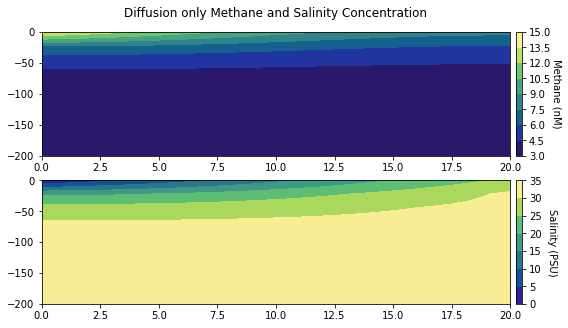

In [63]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap, vmin = 4, vmax = 14)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane (nM)', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 33)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Diffusion only Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
plt.savefig('SteadyDiffusion.pdf')

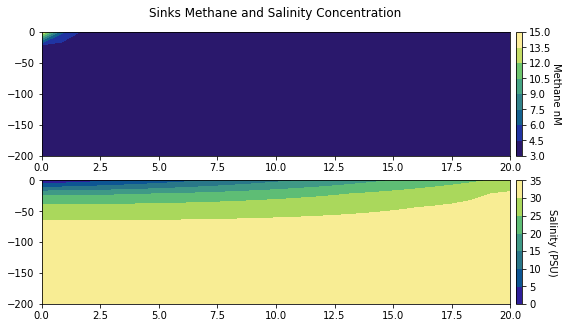

In [64]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap, vmin = 4, vmax = 14)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Ss[-1,:,:].T,cmap=cmap, vmin = 0, vmax = 33)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Sinks Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
plt.savefig('SinksDiffusion.pdf')

In [45]:
dx = 2e4/(ngridx-1)
dz = D/(ngridz-1)
dx, dz

(833.3333333333334, 22.22222222222222)

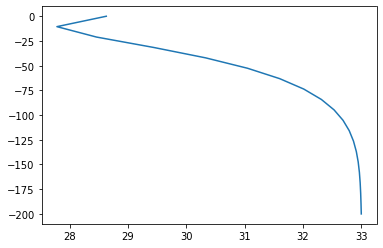

In [124]:
plt.plot(S[-1, 20-1, :].T, -z, label = 'Diffusion Only')

In [70]:
operator_x.shape

(50, 50)

In [71]:
operator_x1.shape

(51, 51)

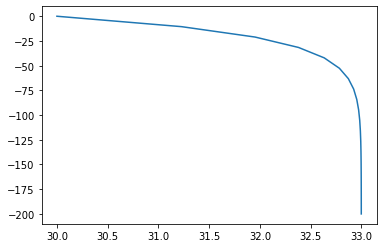

In [104]:
Z = np.linspace(0,200, 20)
S0 = 33
S = 33-3.0*np.exp(-0.05*Z)
plt.plot(S, -Z)
#plt.ylim([-10,0])

In [127]:
1e6/86400

11.574074074074074